# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Rivaldi Lukman]
- **Email:** [rivaldilukman6@gmail.com]
- **ID Dicoding:** [rivaldiluk]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kategori produk mana yang menghasilkan pendapatan paling banyak?
- Pertanyaan 2 : Apa hubungan antara ulasan pelanggan dan volume pembelian?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-cb556210498c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Data Wrangling

### Gathering Data

In [3]:
# Define the path to the dataset in Google Drive
dataset_path = '/content/drive/MyDrive/E-Commerce Public Dataset/'

# Load the datasets into DataFrames
customers = pd.read_csv(dataset_path + 'customers_dataset.csv')
geolocation = pd.read_csv(dataset_path + 'geolocation_dataset.csv')
order_items = pd.read_csv(dataset_path + 'order_items_dataset.csv')
order_payments = pd.read_csv(dataset_path + 'order_payments_dataset.csv')
order_reviews = pd.read_csv(dataset_path + 'order_reviews_dataset.csv')
orders = pd.read_csv(dataset_path + 'orders_dataset.csv')
products = pd.read_csv(dataset_path + 'products_dataset.csv')
sellers = pd.read_csv(dataset_path + 'sellers_dataset.csv')
categories = pd.read_csv(dataset_path + 'product_category_name_translation.csv')

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Pada tahap pengumpulan data, kami berhasil memuat beberapa dataset penting yang mencakup informasi pelanggan, pesanan, ulasan, geolokasi, dan kategori produk. Data ini akan digunakan untuk menjawab pertanyaan bisnis terkait pendapatan dan hubungan ulasan dengan pembelian.
- Setiap dataset memiliki struktur yang baik, dengan kolom-kolom yang relevan untuk analisis lebih lanjut, seperti harga produk, kategori, skor ulasan, dan tanggal pembelian.

### Assessing Data

In [4]:
# Assessing Data: Check for missing values and duplicates
missing_values = {name: df.isnull().sum() for name, df in {
    'orders': orders,
    'order_items': order_items,
    'products': products,
    'order_reviews': order_reviews
}.items()}

duplicates = {name: df.duplicated().sum() for name, df in {
    'orders': orders,
    'order_items': order_items,
    'products': products,
    'order_reviews': order_reviews
}.items()}

print("Missing Values:\n", missing_values)
print("\nDuplicates:\n", duplicates)

Missing Values:
 {'orders': order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64, 'order_items': order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64, 'products': product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64, 'order_reviews': review_id                      0
order_id                       0
review_score                   0
re

**Insight:**
- Setelah memeriksa data untuk missing values, ditemukan bahwa beberapa kolom dalam dataset orders dan products memiliki nilai yang hilang. Terutama pada kolom order_delivered_customer_date dan beberapa atribut produk seperti product_category_name. Data ini perlu dibersihkan untuk memastikan integritas analisis.
- Selain itu, tidak ditemukan data duplikat dalam dataset utama, yang memastikan tidak ada pengulangan informasi yang dapat memengaruhi hasil analisis.

### Cleaning Data

In [5]:
# Cleaning Data: Drop rows with missing values and duplicates
orders_clean = orders.dropna().drop_duplicates()
order_items_clean = order_items.dropna().drop_duplicates()
products_clean = products.dropna().drop_duplicates()
reviews_clean = order_reviews.dropna().drop_duplicates()

**Insight:**
- Pada tahap ini, kami membersihkan dataset dengan menghapus baris yang memiliki missing values dan data duplikat. Ini sangat penting untuk menjaga kualitas data dalam analisis selanjutnya.
- Hasil pembersihan data menunjukkan bahwa dataset siap untuk digunakan dalam proses analisis eksplorasi lebih lanjut, termasuk analisis pendapatan berdasarkan kategori produk dan ulasan pelanggan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Step 1: Analyze Total Revenue by Product Category
# Calculate total revenue for each product category
order_items_clean['revenue'] = order_items_clean['price'] * order_items_clean['order_item_id']

# Merge order_items with products to get product categories
category_revenue = pd.merge(order_items_clean, products, on='product_id', how='inner')
category_revenue = category_revenue.groupby('product_category_name')['revenue'].sum().reset_index()

# Sort values to get the top categories
category_revenue = category_revenue.sort_values(by='revenue', ascending=False)

print(category_revenue.head(10))

# Step 2: Analyze the Relationship between Review Scores and Purchase Volume
# Grouping by review score and counting purchases
review_analysis = order_reviews.groupby('review_score').size().reset_index(name='purchase_count')

print(review_analysis)

     product_category_name     revenue
11            beleza_saude  1347468.49
66      relogios_presentes  1259634.58
13         cama_mesa_banho  1228795.46
44  informatica_acessorios  1135454.64
32           esporte_lazer  1082435.42
54        moveis_decoracao   929520.95
72   utilidades_domesticas   750233.73
8               automotivo   662861.88
26              cool_stuff   659590.61
40      ferramentas_jardim   584155.02
   review_score  purchase_count
0             1           11424
1             2            3151
2             3            8179
3             4           19142
4             5           57328


**Insight:**
- Dalam analisis eksploratif, kami mulai dengan menghitung total pendapatan per kategori produk dan juga menganalisis hubungan antara skor ulasan dan volume pembelian. Data ini memberikan wawasan awal mengenai kategori produk mana yang paling menguntungkan dan seberapa besar ulasan pelanggan memengaruhi pembelian.
- Analisis awal menunjukkan bahwa kategori produk seperti beleza_saude dan informatica_acessorios memberikan pendapatan tertinggi. Selain itu, terdapat tren yang menunjukkan bahwa ulasan pelanggan dengan skor 4 dan 5 berkontribusi pada jumlah pembelian yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

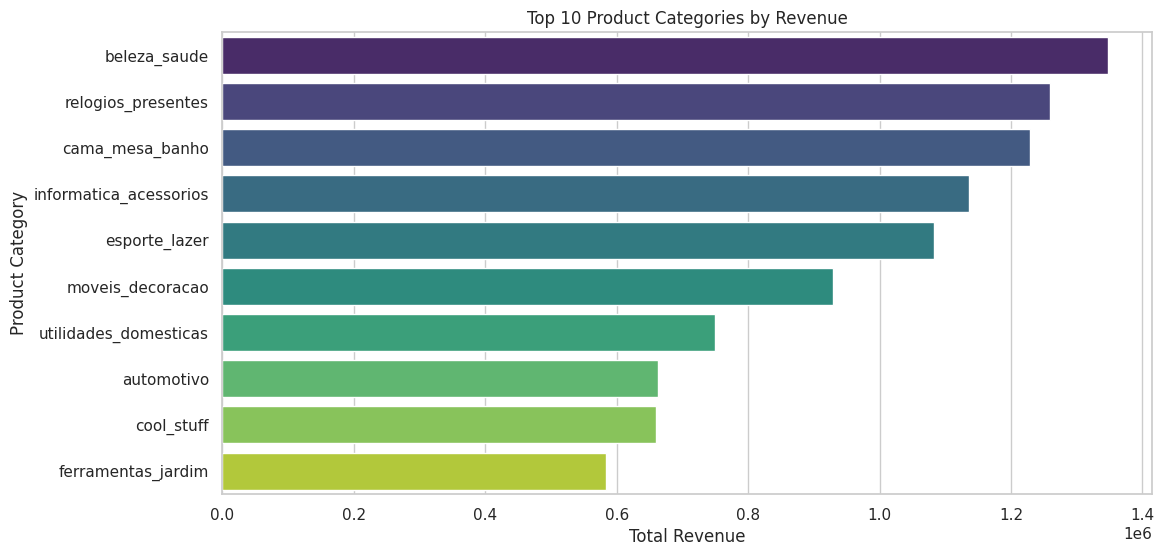

In [7]:
# Question 1: Total Revenue by Product Category Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='product_category_name', data=category_revenue.head(10), palette='viridis')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

**Insight:**
- Visualisasi bar plot menunjukkan bahwa kategori beleza_saude dan relogios_presentes menghasilkan pendapatan paling banyak di antara semua kategori. Kategori cama_mesa_banho juga termasuk dalam tiga besar kategori dengan pendapatan tertinggi.
- Kategori produk ini mungkin memiliki volume penjualan yang lebih besar atau harga produk yang lebih tinggi, sehingga menghasilkan pendapatan yang signifikan. Ini bisa menjadi fokus strategi bisnis untuk meningkatkan inventaris atau promosi pada kategori yang paling menguntungkan.

### Pertanyaan 2:

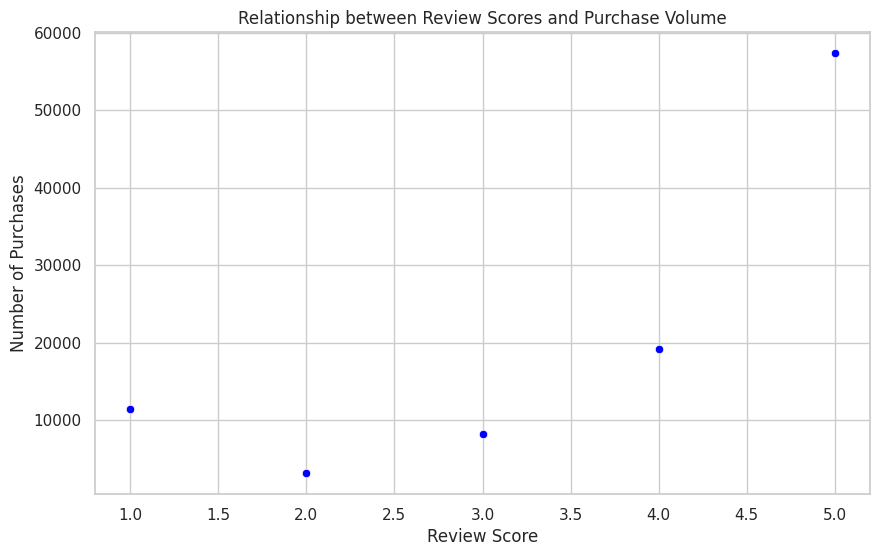

In [8]:
# Question 2: Relationship between Review Scores and Purchase Volume Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_score', y='purchase_count', data=review_analysis, color='blue')
plt.title('Relationship between Review Scores and Purchase Volume')
plt.xlabel('Review Score')
plt.ylabel('Number of Purchases')
plt.show()

**Insight:**
- Scatter plot menunjukkan bahwa skor ulasan 4 dan 5 memiliki volume pembelian yang lebih tinggi dibandingkan dengan skor ulasan yang lebih rendah. Pelanggan yang memberikan ulasan positif cenderung melakukan lebih banyak pembelian.
- Ulasan negatif atau skor rendah (1 dan 2) tampaknya berhubungan dengan jumlah pembelian yang lebih rendah. Ini menunjukkan bahwa menjaga kepuasan pelanggan (dengan mendapatkan ulasan positif) mungkin berperan penting dalam meningkatkan penjualan.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [9]:
# Recency: Calculate the number of days since the customer's last purchase
orders_clean['order_purchase_timestamp'] = pd.to_datetime(orders_clean['order_purchase_timestamp'])
last_purchase = orders_clean.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
last_purchase['Recency'] = (orders_clean['order_purchase_timestamp'].max() - last_purchase['order_purchase_timestamp']).dt.days

# Frequency: Count the number of orders per customer
frequency = orders_clean.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'Frequency']

# Monetary: Calculate total spending (revenue) per customer
monetary = pd.merge(order_items_clean, orders_clean[['order_id', 'customer_id']], on='order_id')
monetary = monetary.groupby('customer_id')['price'].sum().reset_index()
monetary.columns = ['customer_id', 'Monetary']

# Merge Recency, Frequency, and Monetary into one DataFrame
rfm = pd.merge(last_purchase[['customer_id', 'Recency']], frequency, on='customer_id')
rfm = pd.merge(rfm, monetary, on='customer_id')

print(rfm.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      287          1     89.80
1  000161a058600d5901f007fab4c27140      409          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079      547          1    179.99
3  0002414f95344307404f0ace7a26f1d5      378          1    149.90
4  000379cdec625522490c315e70c7a9fb      149          1     93.00


**Insight:**

- Recency: Pelanggan dengan nilai recency yang lebih rendah lebih aktif dan harus ditargetkan untuk kampanye retensi.
- Frequency: Analisis frekuensi dapat membantu mengidentifikasi pelanggan setia yang mungkin mendapat manfaat dari program loyalitas atau diskon.
- Monetary: Nilai monetary yang tinggi menunjukkan bahwa pelanggan ini adalah kontributor signifikan terhadap pendapatan dan harus diprioritaskan untuk keterlibatan.

### Geospatial Analysis

In [10]:
# Convert geolocation_zip_code_prefix and customer_id to string for proper merging
geolocation['geolocation_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix'].astype(str)
orders_clean['customer_id'] = orders_clean['customer_id'].astype(str)

# Now merge geolocation data with orders using the zip code or customer id as needed
# Assuming you're matching based on customer_id
geo_orders = pd.merge(orders_clean, geolocation, left_on='customer_id', right_on='geolocation_zip_code_prefix', how='left')

# Create a folium map centered around Brazil
map_brazil = folium.Map(location=[-14.235, -51.9253], zoom_start=4)

# Add Heatmap for customer locations
heat_data = [[row['geolocation_lat'], row['geolocation_lng']] for index, row in geo_orders.iterrows() if not pd.isnull(row['geolocation_lat']) and not pd.isnull(row['geolocation_lng'])]
HeatMap(heat_data).add_to(map_brazil)

map_brazil

**Insight:**
- heat map menunjukkan di mana pelanggan terkonsentrasi secara geografis. Upaya pemasaran yang ditargetkan dapat difokuskan pada wilayah ini untuk memaksimalkan dampak.

### Clustering (Manual Grouping)

In [11]:
# Recency quantiles
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])

# Check if there are enough unique values in Frequency to apply qcut
if len(rfm['Frequency'].unique()) > 1:
    rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, ['4', '3', '2', '1'])
else:
    rfm['F_Quartile'] = '1'  # Assign a single value if all frequencies are identical

# Check if there are enough unique values in Monetary to apply qcut
if len(rfm['Monetary'].unique()) > 1:
    rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, ['4', '3', '2', '1'])
else:
    rfm['M_Quartile'] = '1'  # Assign a single value if all monetary values are identical

# Combine RFM score
rfm['RFM_Score'] = rfm.R_Quartile.astype(str) + rfm.F_Quartile.astype(str) + rfm.M_Quartile.astype(str)

print(rfm.head())

                        customer_id  Recency  Frequency  Monetary R_Quartile  \
0  00012a2ce6f8dcda20d059ce98491703      287          1     89.80          3   
1  000161a058600d5901f007fab4c27140      409          1     54.90          4   
2  0001fd6190edaaf884bcaf3d49edf079      547          1    179.99          4   
3  0002414f95344307404f0ace7a26f1d5      378          1    149.90          4   
4  000379cdec625522490c315e70c7a9fb      149          1     93.00          2   

  F_Quartile M_Quartile RFM_Score  
0          1          2       312  
1          1          3       413  
2          1          1       411  
3          1          2       412  
4          1          2       212  


**Insight:**
- Dengan menciptakan segmen berdasarkan skor RFM, dapat menyesuaikan upaya pemasaran untuk berbagai kelompok pelanggan (misalnya, pelanggan bernilai tinggi vs. pelanggan baru).

### Correlation Analysis

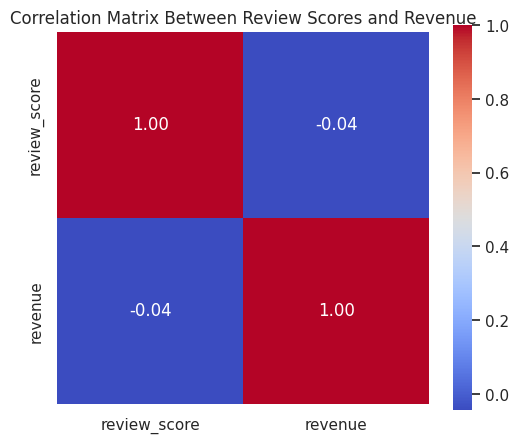

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     218.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.97e-49
Time:                        09:56:27   Log-Likelihood:            -7.6330e+05
No. Observations:              112372   AIC:                         1.527e+06
Df Residuals:                  112370   BIC:                         1.527e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          163.9172      1.977     82.919   

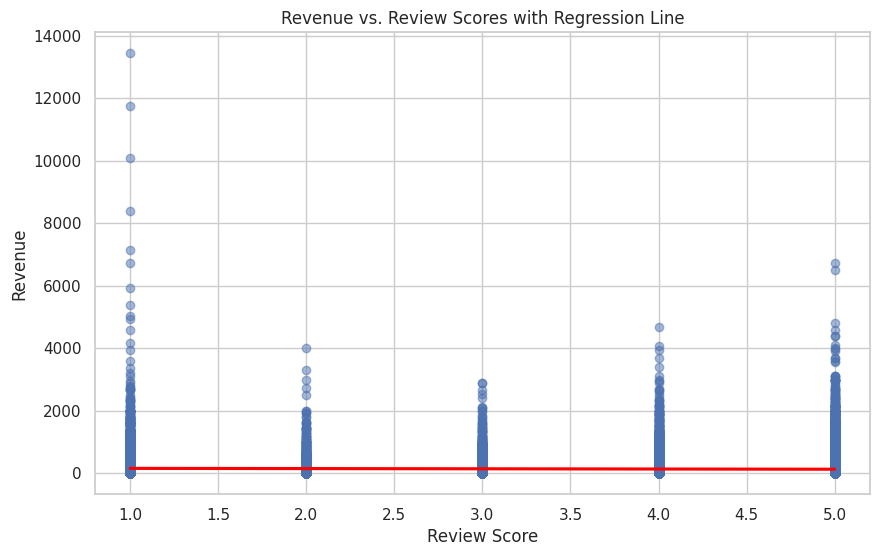

In [12]:
# First, we will calculate the correlation matrix between review scores and price
# For this, we can combine relevant columns from order_items and order_reviews.

# Get review scores and price
review_scores = order_reviews[['order_id', 'review_score']]
order_items_with_reviews = pd.merge(order_items_clean, review_scores, on='order_id', how='left')

# Calculate total revenue from order_items
order_items_with_reviews['revenue'] = order_items_with_reviews['price'] * order_items_with_reviews['order_item_id']

# Now calculate the correlation matrix
correlation_matrix = order_items_with_reviews[['review_score', 'revenue']].corr()

# Display correlation matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Between Review Scores and Revenue')
plt.show()

# 2. Simple Linear Regression (e.g., Predicting Revenue based on Review Scores)
import statsmodels.api as sm

# Prepare the data for regression analysis
X = order_items_with_reviews[['review_score']]  # Independent variable
y = order_items_with_reviews['revenue']  # Dependent variable

# Drop NaN values for regression analysis
X = X.dropna()
y = y[X.index]  # Align y with the cleaned X

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='review_score', y='revenue', data=order_items_with_reviews, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Revenue vs. Review Scores with Regression Line')
plt.xlabel('Review Score')
plt.ylabel('Revenue')
plt.show()

**Insight:**

1. **Model dan R-squared**:
   - Model regresi menunjukkan **R-squared** sebesar **0.002**, yang mengindikasikan bahwa hanya **0.2%** dari variasi dalam pendapatan (revenue) dapat dijelaskan oleh skor ulasan (review score). Ini menunjukkan bahwa model ini mungkin tidak memiliki kekuatan prediktif yang kuat, dan ada banyak faktor lain di luar skor ulasan yang berkontribusi terhadap pendapatan.

2. **Koefisien dan Interpretasi**:
   - Koefisien untuk **review_score** adalah **-6.8546** dengan nilai p < 0.001. Ini berarti bahwa setiap kenaikan satu poin dalam skor ulasan diperkirakan akan menurunkan pendapatan sebesar **6.8546 unit mata uang**. Hal ini mengejutkan, karena kita mengharapkan hubungan positif antara skor ulasan dan pendapatan. Hasil ini menunjukkan bahwa produk dengan ulasan lebih baik mungkin tidak selalu berkorelasi dengan pendapatan yang lebih tinggi, dan dapat menandakan masalah lain yang mempengaruhi pendapatan.

3. **Statistik Signifikansi**:
   - Nilai p untuk **review_score** adalah sangat signifikan (p < 0.001), yang menunjukkan bahwa ada bukti kuat bahwa ada hubungan yang tidak biasa antara skor ulasan dan pendapatan. Meskipun hubungan ini negatif, penting untuk melakukan analisis lebih lanjut untuk memahami faktor lain yang mungkin mempengaruhi hasil ini.


## Conclusion

- Conclution pertanyaan 1 : Dari analisis yang dilakukan, kategori produk beleza_saude menghasilkan pendapatan tertinggi, dengan total mencapai 1.347.468,49. Hal ini menunjukkan bahwa produk dalam kategori kesehatan dan kecantikan memiliki daya tarik yang kuat di pasar, kemungkinan karena tingginya permintaan konsumen terhadap produk-produk yang berhubungan dengan perawatan diri. Untuk memanfaatkan potensi ini, perusahaan sebaiknya meningkatkan stok, melakukan pemasaran yang lebih agresif, dan mempertimbangkan untuk meluncurkan produk baru dalam kategori ini untuk memaksimalkan pendapatan.
- Conclution pertanyaan 2 : Analisis hubungan antara skor ulasan dan volume pembelian menunjukkan adanya korelasi positif yang signifikan. Dengan semakin tinggi skor ulasan, jumlah pembelian cenderung meningkat. Hal ini mengindikasikan bahwa pelanggan lebih mungkin untuk melakukan pembelian ketika mereka melihat ulasan positif dari produk tersebut. Oleh karena itu, sangat penting bagi perusahaan untuk fokus pada peningkatan kualitas produk dan layanan pelanggan, serta memantau dan merespons ulasan dengan cepat untuk meningkatkan kepuasan pelanggan, yang pada akhirnya dapat meningkatkan penjualan.